In [3]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import fsspec
import numpy as np

from vcm.catalog import catalog


grid = catalog["grid/c48"].read()
area = grid["area"]

land_sea_mask = catalog["landseamask/c48"].read()["land_sea_mask"]

def plot_zonal_pressure_bias(diags, diags_baseline, var, **plot_kwargs):
    fig = plt.figure()
    ds = xr.concat(
        [diags_baseline[[var]]] + [diags[experiment][[var]] for experiment in diags] ,
        dim=pd.Index(["baseline"] + [f"{tau} hr" for tau in diags.keys()], name="timescale")
    )

    return ds[var].plot(
        x="latitude",
        yincrease=False,
        col="timescale",
        **plot_kwargs
    )
    return fig

In [9]:
experiments = [
    "temperature-moisture-RF",
    "temperature-moisture-winds-RF",
    "temperature-moisture-winds-prescribed-sfc-RF",
    "temperature-moisture-winds-prescribed-sfc-NN-ensemble"
]

prog_run_paths = [
    "gs://vcm-ml-experiments/2021-05-11-nudge-to-c3072-corrected-winds/control-dq1-dq2-rf/initial_conditions_runs/20160805.000000",
    "gs://vcm-ml-experiments/2021-05-11-nudge-to-c3072-corrected-winds/control-rf/prognostic_run_tendencies_only_ics/20160805.000000",
    "gs://vcm-ml-experiments/2021-05-11-nudge-to-c3072-corrected-winds/rf/initial_conditions_runs/20160805.000000",
    "gs://vcm-ml-experiments/2021-05-11-nudge-to-c3072-corrected-winds/nn-ensemble-model/initial_conditions_runs_rectified_nn_rad/20160805.000000"
]
paths = [f"gs://vcm-ml-public/argo/prog-report-nudge-to-3km-ablation-runs/{exp}" for exp in experiments]


with fsspec.open("gs://vcm-ml-public/argo/2021-05-04-nudge-to-c3072-prog-timescales/physics-on-baseline/diags.nc", "rb") as f:
    diags_baseline = xr.open_dataset(f).load()
    
    
diags = {}
for experiment, path in zip(experiments , paths):
    print(path)
    with fsspec.open(f"{path}/diags.nc", "rb") as f:
        diags[experiment] = xr.open_dataset(f).load()

gs://vcm-ml-public/argo/prog-report-nudge-to-3km-ablation-runs/temperature-moisture-RF
gs://vcm-ml-public/argo/prog-report-nudge-to-3km-ablation-runs/temperature-moisture-winds-RF
gs://vcm-ml-public/argo/prog-report-nudge-to-3km-ablation-runs/temperature-moisture-winds-prescribed-sfc-RF
gs://vcm-ml-public/argo/prog-report-nudge-to-3km-ablation-runs/temperature-moisture-winds-prescribed-sfc-NN-ensemble


Text(95.375, 0.5, 'Pressure [Pa]')

<Figure size 432x288 with 0 Axes>

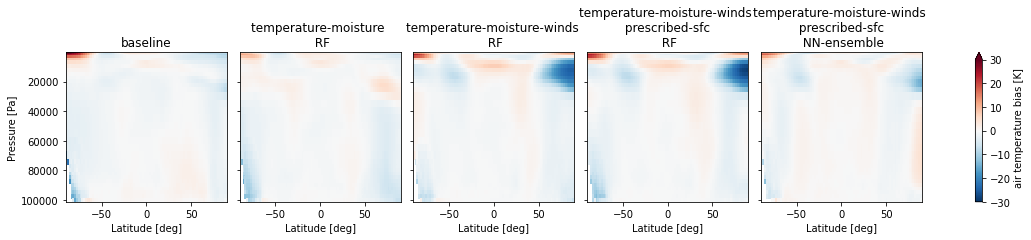

In [29]:
fig = plot_zonal_pressure_bias(diags, diags_baseline, "air_temperature_pressure_level_zonal_bias", vmax=30)
fig.cbar.set_label("air temperature bias [K]")

# plot function puts baseline first
labels = [
    "baseline",
    "temperature-moisture \n RF",
    "temperature-moisture-winds \n RF",
    "temperature-moisture-winds \n prescribed-sfc \n RF",
    "temperature-moisture-winds \n prescribed-sfc \n NN-ensemble"
]
for ax, label in zip(fig.axes[0], labels):
    ax.set_xlabel("Latitude [deg]")
    ax.set_title(label)
fig.axes[0][0].set_ylabel("Pressure [Pa]")

In [55]:
from dataclasses import dataclass
import dacite
@dataclass
class Derived:
    model_type: str
    hyperparameters: dict
        
    def __post_init__(self):
        self.base_hyperparameters = dacite.from_dict(data_class=Dense, data=self.hyperparameters)
            
@dataclass 
class Dense:
    epochs: int
    layers: int

In [56]:
d = Derived(model_type="denseModel", hyperparameters = {"epochs": 1, "layers": 2})

In [58]:
d.__dict__

{'model_type': 'denseModel',
 'hyperparameters': {'epochs': 1, 'layers': 2},
 'base_hyperparameters': Dense(epochs=1, layers=2)}